<a href="https://colab.research.google.com/github/raknampuna/csci-82_Fall2020/blob/master/2020_HW4_CSCI_E_82_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CSCI E-82  Homework 4

### Due by 10/28/20 at 11:59pm EST to the Canvas dropbox

## This is an individual homework so there should be no collaboration for this homework.


### Under each problem, we have a place for you to write the answer, or write runnable code that will produce the answer.  Show your work.  Provide insights that are guiding your steps and interpretations of your results.
-----------


## Your Name: 

Anup Mankar

### Imports

In [ ]:
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import date
import math

import sklearn as sks
from sklearn import linear_model
from sklearn.metrics import r2_score

from scipy import stats
from scipy.stats import ttest_ind

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.graphics.api as smg
from statsmodels.tsa.stattools import acf, pacf

# !pip install statsmodels
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot
from scipy.signal import periodogram
from statsmodels.tsa.seasonal import seasonal_decompose

import os
from google.colab import files, drive

# !pip install lifelines
import lifelines #pip install lifelines
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter


dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),            
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

     |████████████████████████████████| 348kB 4.5MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp36-none-any.whl size=4035 sha256=67fe31482453f279c6e5e209234e8064daf788f0a2724d56eb54eb59e5cfbd08
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


### Problem 1 Climate Change (30 points) 

Scientists and politicians are often at odds on the topic of whether global warming is real and debate the various causes. This problem uses "globalWarm3.csv" data.  This is a real data set.

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.getcwd()
warm = pd.read_csv('/content/gdrive/My Drive/masters/2020Fall_CSCI-82/hw4-timeseries/globalWarm3.csv')
warm

,Year,Temp,CO2,Solar,Transmission,IceShelf
0,1980,19,338.57,1366.51,0.929667,7.85
1,1981,26,339.92,1366.51,0.929767,7.25
2,1982,4,341.30,1366.16,0.853067,7.45
3,1983,25,342.71,1366.18,0.897717,7.52
4,1984,9,344.24,1365.71,0.916492,7.17
5,1985,4,345.81,1365.57,0.924425,6.93
6,1986,12,347.11,1365.59,0.926792,7.54
7,1987,27,348.72,1365.67,0.929092,7.48
8,1988,31,351.04,1365.97,0.930125,7.49
9,1989,19,352.68,1366.46,0.929483,7.04


Note the NA Value for Transmission in year 1996.  There are other methods for dealing with NAs, but for now I'll drop that whole row.  

In [ ]:
warm_full = warm
warm = warm.dropna()
print(warm.shape)
warm.head()

(30, 6)


,Year,Temp,CO2,Solar,Transmission,IceShelf
0,1980,19,338.57,1366.51,0.929667,7.85
1,1981,26,339.92,1366.51,0.929767,7.25
2,1982,4,341.30,1366.16,0.853067,7.45
3,1983,25,342.71,1366.18,0.897717,7.52
4,1984,9,344.24,1365.71,0.916492,7.17


### Problem 1a (5 points)
Plot a scatter plot of the following variables in a lattice: Temp, CO2, Solar, Transmission, and IceShelf. 
    
The variables represent the following:
- Temp = annual surface temperature measured in $1/100^{\circ} C$ over the 1950-1980 mean.
- Solar = annual mean intensity of sunlight piercing the atmosphere 
- CO2 = annual average fraction CO2 in atmosphere (#molecules/#molecules of dry air) 
- IceShelf = sea ice in 1MM square miles hypothesized to reflect heat 
- Transmission = volcanic MLO transmission data where eruptions release greenhouse gases but also decrease the temperature 




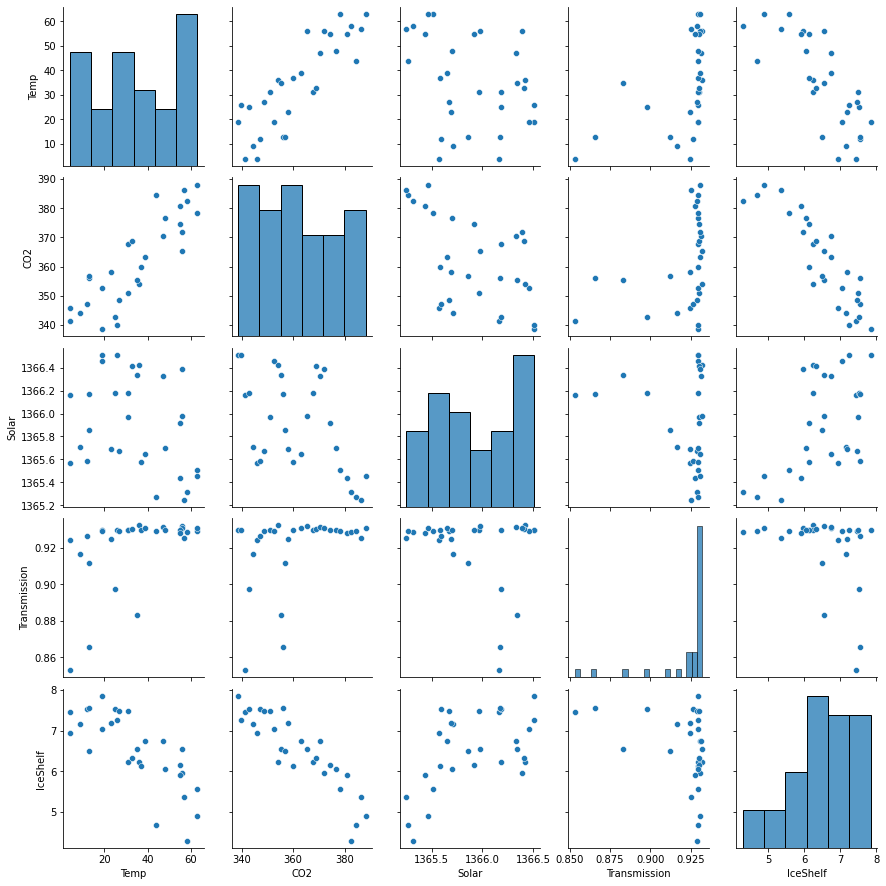

In [ ]:
warm_data = warm.iloc[:,1:6]
sns.pairplot(warm_data)

Simply from a preliminary visual analysis the most striking relationship is between C02 and the ice shelf.  From a purely visual standpoint the it seems to be stronger than even temperature and the ice shelf, which is strange but might be explained by the fact that the temperature is **the mean** across the surface of the earth so may not account for regional differences in the regions where the ice shelves are.  

While there are some outliers, transmission in general doesn't seem to have a strong relationship with any variable. This makes some sense as volcanic eruptions are likely a totally random independent event.  

Visually the rest seem to have very moderate to weak relationships. 

### Problem 1b (5 points)

Thinking as a statistician, prove or disprove that there is global warming using this data set? This is not a policital, moral, or ethical question. 

Taking a simple approach, i will test the following hypothesis: 

>> Null Hypothesis; MeanTemp1980-1995 = MeanTemp1997-2010
> 
>> Alternate Hypthesis;  MeanTemp1980-1995 < MeanTemp1997-2010
> 



In [ ]:
# first, is it warmer in the second half of the dataset compared to the first half
firsthalf_temps, firsthalf_avgtemps = np.asarray(warm.iloc[0:16,1]),np.mean(warm.iloc[0:14,1])
secondhalf_temps, secondhalf_avgtemps = np.asarray(warm.iloc[17:,1]),np.mean(warm.iloc[15:,1])

print("the first half of the data, the mean temp was:",round(firsthalf_avgtemps,2))
print("the second half of the data, the mean temp was:",round(secondhalf_avgtemps,2))
#then linear regression 

the first half of the data, the mean temp was: 19.5
the second half of the data, the mean temp was: 49.47


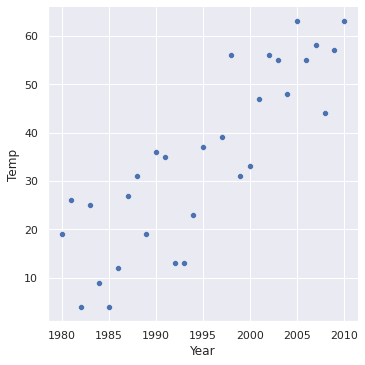

In [ ]:
sns.set_theme()
sns.relplot(
    data=warm,
    x="Year", y="Temp"
)

From both of these very simple methods we should have pretty strong intuition that warming is occuring.  But, since we're wearing our statistician hats, we know we need some real evidence

In [ ]:
t_stat = ttest_ind(firsthalf_temps, secondhalf_temps)

In [ ]:
print("p-value for the difference between these two datasets:",round(t_stat.pvalue,10))

p-value for the difference between these two datasets: 3.03e-08


Based on this t-stat / p-value, and the very simple question "is there global warming?" We can say yes, there is global warming as measured by the average increase in temperature.  

NOTE: This does NOT answer the question what is causing global warming?


### Problem 1c (12 points)

Compute a multiple linear regression model of log(Temp) against the other variables. Note that since there are limited number of annual measurements, you cannot run all combinations of variables. In fact, you can only do complete pairwise interactions. Be sure to remove the non-significant variables while still maintaining the hierarchy principle in your final model. You do not need to show full diagnostics for the different models that you try, but do show the fits that you tried and explain why you rejected the non-final ones.  Although it is arguable whether Year should be included in the analysis, we're going to ask that you not include that variable for this portion of the analysis.

You will likely have to include multiple iterations.  Do include those and explain what you're doing and why (perhaps 1 sentence)

For this problem, i will experiment a bit at the top (but will try and keep it short).  First I defined a few different functions to implement multiple linear regression models from different modules to see which one works the best.  

Then from there I will primarily focus on the p-value and f-statistic in a **Backward step-wise** model selection algorithm where i start with a model with all variables and 

In [ ]:
log_tmp = np.log(warm.Temp)
warm_data_lr = warm_data.iloc[:,1:]
# print(warm_data_lr.head())

#sklearn's linear regression model
def sk_mult_lr(data):
  lm_modl = sks.linear_model.LinearRegression().fit(X = data, y = log_tmp)
  print(pd.DataFrame(lm_modl.coef_, index = (np.asanyarray(data.columns)),columns=['coeff']))
  return lm_modl

def sp_mult_lr(data):
  slope, intercept, r_value, p_value, std_err = stats.linregress(x = data, y = log_tmp)
  return slope, intercept, r_value, p_value, std_err

def sm_mult_lr(data):
  modl = sm.OLS(log_tmp, data).fit()
  return modl

In [ ]:
sk_mult_lr(warm_data_lr)

                  coeff
CO2            0.042185
Solar          0.565715
Transmission  12.279563
IceShelf       0.058034


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#with all data
sm_modl = sm_mult_lr(warm_data_lr)
print(sm_modl.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Temp   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              383.7
Date:                Sat, 31 Oct 2020   Prob (F-statistic):                    1.05e-22
Time:                        15:22:50   Log-Likelihood:                         -18.021
No. Observations:                  30   AIC:                                      44.04
Df Residuals:                      26   BIC:                                      49.65
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
#now will include all interaction data
#first create 1 dataset
warming = warm_data_lr
warming['LogTemp'] = log_tmp

From here, I will add ALL interaction variables and drop the least significant variable at each step until i have a full model which seems to work.

Note: I will NOT show my results summary at each step to save strain on the part of the grader, but will primarily look at the p-values for each coefficient and drop the worst one in each step.

In [ ]:
#formula with all interactions
f = 'LogTemp ~ CO2 + Solar + Transmission + IceShelf + CO2 * Solar + CO2 * Transmission + CO2 * IceShelf + Solar * Transmission + Solar * IceShelf + Transmission * IceShelf'
modl_fullX = sm.OLS.from_formula(formula = f, data = warming)
results = modl_fullX.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                LogTemp   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     10.05
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           1.18e-05
Time:                        15:22:52   Log-Likelihood:                -5.9685
No. Observations:                  30   AIC:                             33.94
Df Residuals:                      19   BIC:                             49.35
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.633e+

Now I'll just start dropping the least significant variables until I have a model which has only significant coefficients. 

In [ ]:
#with Transmission:IceShelf dropped
f = 'LogTemp ~ CO2 + Solar + Transmission + IceShelf + CO2 * Solar + CO2 * Transmission + CO2 * IceShelf + Solar * Transmission + Solar * IceShelf'
modl_fullX_2 = sm.OLS.from_formula(formula = f, data = warming)
results = modl_fullX_2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                LogTemp   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     11.65
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           3.51e-06
Time:                        15:22:54   Log-Likelihood:                -6.0818
No. Observations:                  30   AIC:                             32.16
Df Residuals:                      20   BIC:                             46.18
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.564e+05   4.37

In [ ]:
#with CO2:Transmission dropped
f = 'LogTemp ~ CO2 + Solar + Transmission + IceShelf + CO2 * Solar + CO2 * IceShelf + Solar * Transmission + Solar * IceShelf'
modl_fullX_3 = sm.OLS.from_formula(formula = f, data = warming)
results = modl_fullX_3.fit()
# print(results.summary())

In [ ]:
#after dropping solar:iceshelf (the worst interaaction term)
f = 'LogTemp ~ CO2 + Solar + Transmission + IceShelf + CO2 * Solar + CO2 * IceShelf + Solar * Transmission'
modl_fullX_4 = sm.OLS.from_formula(formula = f, data = warming)
results = modl_fullX_4.fit()
#print(results.summary())

In [ ]:
#with CO2:IceShelf dropped 
f = 'LogTemp ~ CO2 + Solar + Transmission + IceShelf + CO2 * Solar + Solar * Transmission'
modl_fullX_5 = sm.OLS.from_formula(formula = f, data = warming)
results = modl_fullX_5.fit()
#print(results.summary())

In [ ]:
#with CO2:Solar dropped 
f = 'LogTemp ~ CO2 + Solar + Transmission + IceShelf + Solar * Transmission'
modl_fullX_6 = sm.OLS.from_formula(formula = f, data = warming)
results = modl_fullX_6.fit()
#print(results.summary())

In [ ]:
#finally with IceShelf dropped
f = 'LogTemp ~ CO2 + Solar + Transmission + Solar * Transmission'
modl_fullX_7 = sm.OLS.from_formula(formula = f, data = warming)
results = modl_fullX_7.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                LogTemp   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     26.23
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           1.26e-08
Time:                        15:22:56   Log-Likelihood:                -8.8358
No. Observations:                  30   AIC:                             27.67
Df Residuals:                      25   BIC:                             34.68
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -1.44e+05   4.09

After going through this process, I find a final model with Intercept, Co2, solar, transmission and interaction term solar:transmission as significant contributers.  Note that our R_squared values is actually LOWER than the original 

### Problem 1d (8 points)

Show the diagnostics to illustrate why your final model is appropriate.  Include a sentence explanation for each.

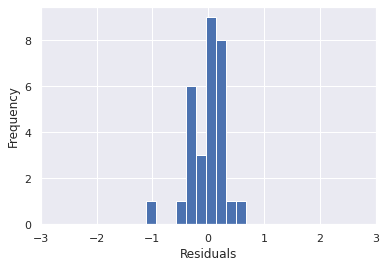

In [ ]:
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-3,3)
plt.grid(True)
plt.hist(results.resid)
plt.show()

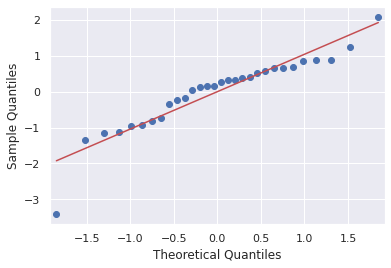

In [ ]:
fig = sm.qqplot(results.resid, fit=True, line='r')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


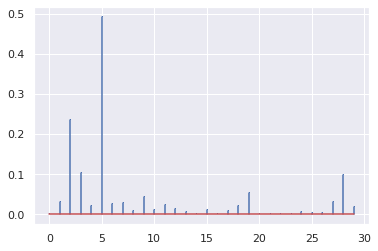

In [ ]:
# Cooks distance -  is also used estimate of the influence of a data point
influence = results.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.show()

#### Intepretation

I'm a little concerned with the QQ Plot, i'm seeing some non-normality.  

After a few iterations I'm seeing that using the square of the temperature actually seems to increase the normality of the qq plot but there is a trade off in that the R_squared value decreases further.  

In [ ]:
warming_2 = warming.drop("LogTemp",axis = 1)
warming_2['sqre_tmp'] = np.square(warm.Temp)
warming_2.head()

,CO2,Solar,Transmission,IceShelf,sqre_tmp
0,338.57,1366.51,0.929667,7.85,361
1,339.92,1366.51,0.929767,7.25,676
2,341.30,1366.16,0.853067,7.45,16
3,342.71,1366.18,0.897717,7.52,625
4,344.24,1365.71,0.916492,7.17,81


In [ ]:
#finally with IceShelf dropped

f = 'sqre_tmp ~ CO2 + Solar + Transmission + Solar * Transmission'
modl_fullX_8 = sm.OLS.from_formula(formula = f, data = warming_2)
results = modl_fullX_8.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               sqre_tmp   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     21.41
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           9.01e-08
Time:                        15:23:25   Log-Likelihood:                -234.64
No. Observations:                  30   AIC:                             479.3
Df Residuals:                      25   BIC:                             486.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.156e+08    7.6

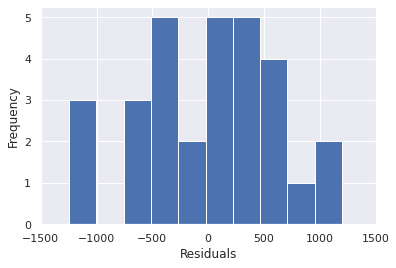

In [ ]:
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-1500,1500)
plt.grid(True)
plt.hist(results.resid)
plt.show()

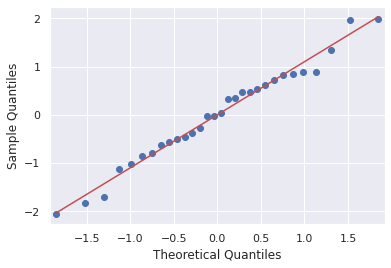

In [ ]:
fig = sm.qqplot(results.resid, fit=True, line='r')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


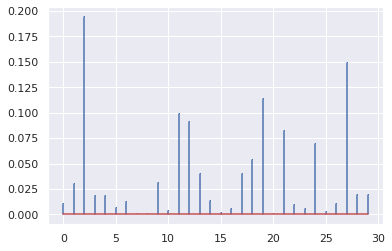

In [ ]:
# Cooks distance -  is also used estimate of the influence of a data point
influence = results.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.show()

## Problem 2 Time Series Modeling (30 points)

Use the data timeSeries4.csv for this problem. The data are monthly reports of production.


### Problem 2a (5 points)
Plot the data and perform an exploratory analysis on the raw time series file. Comment on any trends, outliers, seasonality, whether it's stationary, etc.  You are free to make limited appropriate corrections to the data for the purpose of ensuring a good model.

I'm performing various updates to the "production" variable.  Please note the below section is not necessarily sequential - I came back and added some of these variables to do more analysis.

In [ ]:
ts_data = pd.read_csv('/content/gdrive/My Drive/masters/2020Fall_CSCI-82/hw4-timeseries/timeSeries4.csv',header = None, names=['month','production'])

#I'm arbitrarily changing the month data to start in 2000 so that I can get the row index in the correct format
ts_data['date'] = pd.date_range(start='1/1/2000', periods=ts_data.shape[0], freq='M')
ts_data['prod_diff_12'], =ts_data['production'].diff(12),
ts_data['prod_log'], = np.log(ts_data['production']),
ts_data['prod_sqrt'], = np.sqrt(ts_data['production']), 
ts_data['diff_prod_log'] = ts_data['prod_log'].diff()
ts_data['diff_prod_log_12'] = ts_data['prod_log'].diff(12)
ts_data['diff_prod_sqrt'], = np.sqrt(ts_data['prod_sqrt']),
 
ts_data.asfreq("M", method="ffill")
ts_data.index = ts_data.date
ts_data.describe()

,month,production,prod_diff_12,prod_log,prod_sqrt,diff_prod_log,diff_prod_log_12,diff_prod_sqrt
count,148.000000,148.000000,136.000000,148.000000,148.000000,147.000000,136.000000,148.000000
mean,73.500000,24.529022,0.455645,3.193318,4.944897,0.001515,0.018628,2.222789
std,42.868014,2.648555,1.882073,0.119469,0.278461,0.112144,0.102320,0.064302
min,0.000000,10.521345,-11.163404,2.353406,3.243662,-0.723713,-0.723203,1.801017
25%,36.750000,22.811038,-0.349090,3.127245,4.776090,-0.052723,-0.014043,2.185427
50%,73.500000,24.536239,0.448540,3.200151,4.953407,-0.010359,0.018298,2.225625
75%,110.250000,26.703908,1.267194,3.284810,5.167582,0.051165,0.051222,2.273232
max,147.000000,29.688140,11.109057,3.390748,5.448682,0.712545,0.720694,2.334241


In [ ]:
# ts_data = ts_data.dropna() #there's an NA variable which is messing with some of my metrics. I'll drop it here
ts_data.head(15) #i'll have to use smaller sets of data for diff columns

,month,production,date,prod_diff_12,prod_log,prod_sqrt,diff_prod_log,diff_prod_log_12,diff_prod_sqrt
date,,,,,,,,,
2000-01-31,0,21.684748,2000-01-31,NaN,3.076609,4.656689,NaN,NaN,2.157936
2000-02-29,1,21.622112,2000-02-29,NaN,3.073717,4.649958,-0.002893,NaN,2.156376
2000-03-31,2,19.583297,2000-03-31,NaN,2.974677,4.425302,-0.099040,NaN,2.103640
2000-04-30,3,23.290602,2000-04-30,NaN,3.148050,4.826034,0.173373,NaN,2.196824
2000-05-31,4,21.729621,2000-05-31,NaN,3.078676,4.661504,-0.069374,NaN,2.159052
2000-06-30,5,21.098816,2000-06-30,NaN,3.049217,4.593345,-0.029459,NaN,2.143209
2000-07-31,6,21.282693,2000-07-31,NaN,3.057894,4.613317,0.008677,NaN,2.147863
2000-08-31,7,22.184688,2000-08-31,NaN,3.099402,4.710062,0.041508,NaN,2.170268
2000-09-30,8,23.835405,2000-09-30,NaN,3.171172,4.882152,0.071770,NaN,2.209559


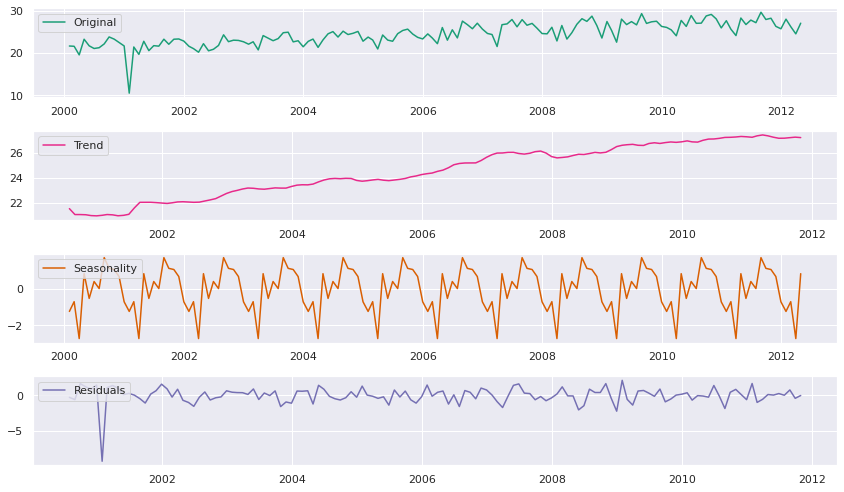

In [ ]:
def breakout_plots(seas_series):
    decomposition = seasonal_decompose(seas_series) 

    f, ax = plt.subplots(1,4,figsize=(12, 7))

    plt.subplot(411)
    plt.plot(seas_series, label='Original', c=dark2_colors[0])
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', c=dark2_colors[1])
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(decomposition.seasonal,label='Seasonality', c=dark2_colors[2])
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', c=dark2_colors[3])
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
    
    return decomposition

decomposition = breakout_plots(ts_data['production'])

Looking at the above, I'm seeing an outlier around the beginning of 2001 (again date is actually made up).  You can see this in the original data and in the residual chart. 

The trend seems generally upward and relatively stable - so not stationary. 

The Seasonality is pronounced.  The range of the seasonal effect looks to be around 3, considering the data has a mean of 24 it's about a 12% seasonal fluctuation which is pretty big in my opinion

Other than the outlier, the residual actually looks pretty normally distributed - for examp,e it's NOT increasing or decreasing over time.  


Because this outlier is quite big I don't really see any reason to keep it in our analysis going forward, so I'm going to repace it with the average and refresh my data (so calculated diffs are OK). 

In [ ]:
#repull the data
ts_data = pd.read_csv('/content/gdrive/My Drive/masters/2020Fall_CSCI-82/hw4-timeseries/timeSeries4.csv',header = None, names=['month','production'])

ts_data['date'] = pd.date_range(start='1/1/2000', periods=ts_data.shape[0], freq='M')
ts_data.asfreq("M", method="ffill")
ts_data.index = ts_data.date

#replace the outlier
ts_data.loc['2001-01-31','production'] = (ts_data.loc['2000-12-31','production'] + ts_data.loc['2001-02-28','production'])/2

#rerun the formatting I did
ts_data['date'] = pd.date_range(start='1/1/2000', periods=ts_data.shape[0], freq='M')
ts_data['prod_diff_12'], =ts_data['production'].diff(12),
ts_data['prod_log'], = np.log(ts_data['production']),
ts_data['prod_sqrt'], = np.sqrt(ts_data['production']), 
ts_data['diff_prod_log'] = ts_data['prod_log'].diff()
ts_data['diff_prod_log_12'] = ts_data['prod_log'].diff(12)
ts_data['diff_prod_sqrt'], = np.sqrt(ts_data['prod_sqrt']),
 
ts_data.head(15)

,month,production,date,prod_diff_12,prod_log,prod_sqrt,diff_prod_log,diff_prod_log_12,diff_prod_sqrt
date,,,,,,,,,
2000-01-31,0,21.684748,2000-01-31,NaN,3.076609,4.656689,NaN,NaN,2.157936
2000-02-29,1,21.622112,2000-02-29,NaN,3.073717,4.649958,-0.002893,NaN,2.156376
2000-03-31,2,19.583297,2000-03-31,NaN,2.974677,4.425302,-0.099040,NaN,2.103640
2000-04-30,3,23.290602,2000-04-30,NaN,3.148050,4.826034,0.173373,NaN,2.196824
2000-05-31,4,21.729621,2000-05-31,NaN,3.078676,4.661504,-0.069374,NaN,2.159052
2000-06-30,5,21.098816,2000-06-30,NaN,3.049217,4.593345,-0.029459,NaN,2.143209
2000-07-31,6,21.282693,2000-07-31,NaN,3.057894,4.613317,0.008677,NaN,2.147863
2000-08-31,7,22.184688,2000-08-31,NaN,3.099402,4.710062,0.041508,NaN,2.170268
2000-09-30,8,23.835405,2000-09-30,NaN,3.171172,4.882152,0.071770,NaN,2.209559


Now I'll run some more decomposition charts

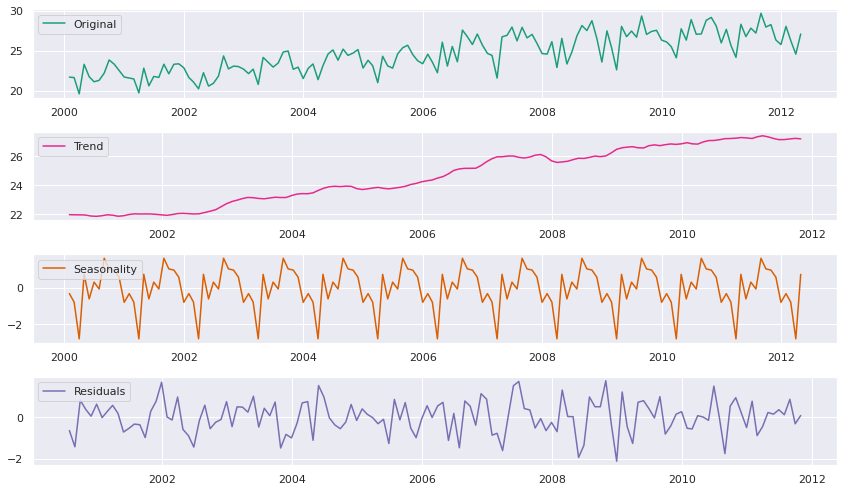

In [ ]:
decomposition = breakout_plots(ts_data['production'])

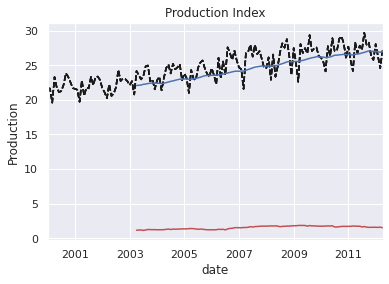

In [ ]:
#plot the time series
ts_data['production'].plot(style='k--', title=titl )
ts_data['production'].plot(style='k--', title=titl)
plt.xlabel('Year')
plt.ylabel('Production')

# calculate 10 year rolling mean and std and plot
ts_data['production'].plot(style='k--', title=titl )
ts_data['production'].rolling(window=40).std().plot(style='r')
ts_data['production'].plot(style='k--', title=titl )
ts_data['production'].rolling(window=40).mean().plot(style='b')
plt.show()

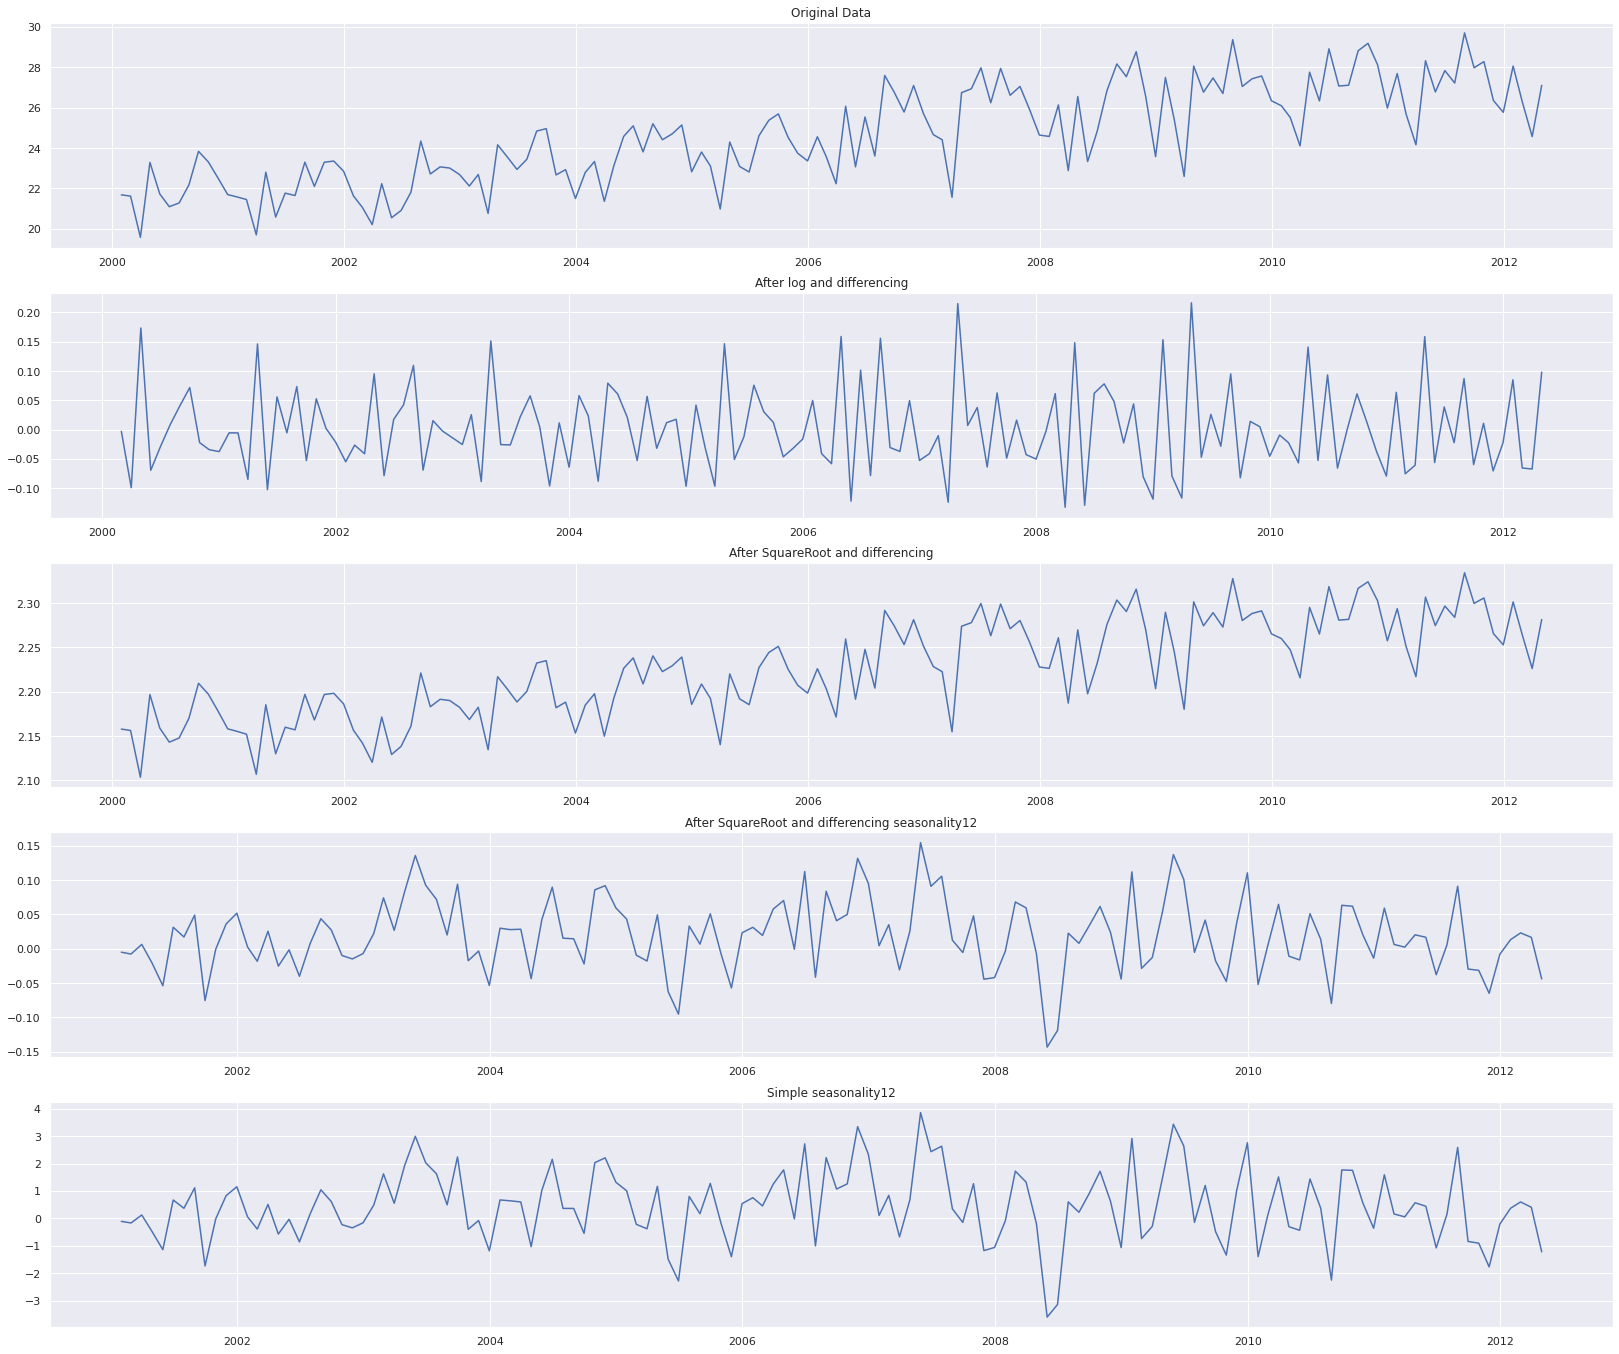

In [ ]:
f, ax = plt.subplots(5, 1,figsize=(28, 24))
ax[0].plot(ts_data['production']);
ax[0].set_title('Original Data')
ax[1].plot(ts_data['diff_prod_log']);
ax[1].set_title('After log and differencing');
ax[2].plot(ts_data['diff_prod_sqrt']);
ax[2].set_title('After SquareRoot and differencing');
ax[3].plot(ts_data['diff_prod_log_12']);
ax[3].set_title('After SquareRoot and differencing seasonality12');
ax[4].plot(ts_data['prod_diff_12']);
ax[4].set_title('Simple seasonality12');
plt.show()

The log and differenced (middle chart above) data looks pretty good to me! not only does the variance seem pretty stable, it seems to be stationary around zero (though the mean is likely a little higher)

Finally, let's try and break this data out monthly and see if there's anything interesting. 

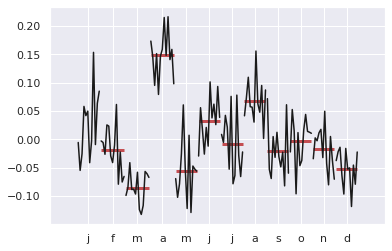

In [ ]:
_ = smg.tsa.month_plot(ts_data['diff_prod_log'])
plt.show()

It looks like April is a pretty stand out month in terms of production.  

### Problem 2b (5 points)

Plot the ACF and PACF for the data. Argue what kind of model it suggests.

Above i thought the logged difference data seemed to be a good model, but I'm going to take a look at a few different ARIMA iterations here to feel out the data.

Here's the original data for a base line.

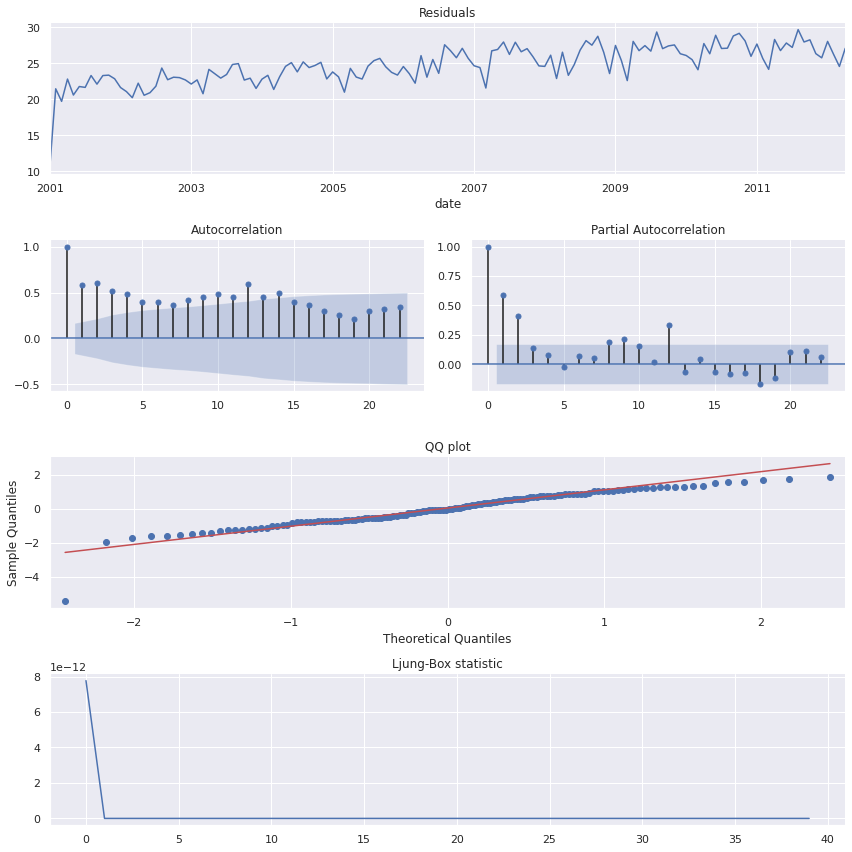

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5b1d30a208>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b25f815f8>)

In [ ]:
#seaborn.set(style='ticks', context='talk')

def tsplot(y, lags=None, figsize=(12, 12)):
    
    q, p = sm.stats.diagnostic.acorr_ljungbox(y,lags)
    fig = plt.figure(figsize=figsize)
    layout = (4, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0), colspan=2, title='QQ plot')
    lbox_ax = plt.subplot2grid(layout, (3, 0), colspan=2, title='Ljung-Box statistic')

    y.plot(ax=ts_ax, title='Residuals')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)

    qqplot(y,  line='q', ax=qq_ax, fit=True)
    if np.max(p) > 0.05:
        lbox_ax.axhline(y=0.05, xmin=0, xmax=lags, c ='r')
    lbox_ax.plot(p)
    seaborn.despine()
    plt.tight_layout()
    plt.show()
    return ts_ax, acf_ax, pacf_ax, lbox_ax

tsplot(ts_data['production'])

The high positive auto correlation indicates we need a higher order differencing. 

Here's the log data:

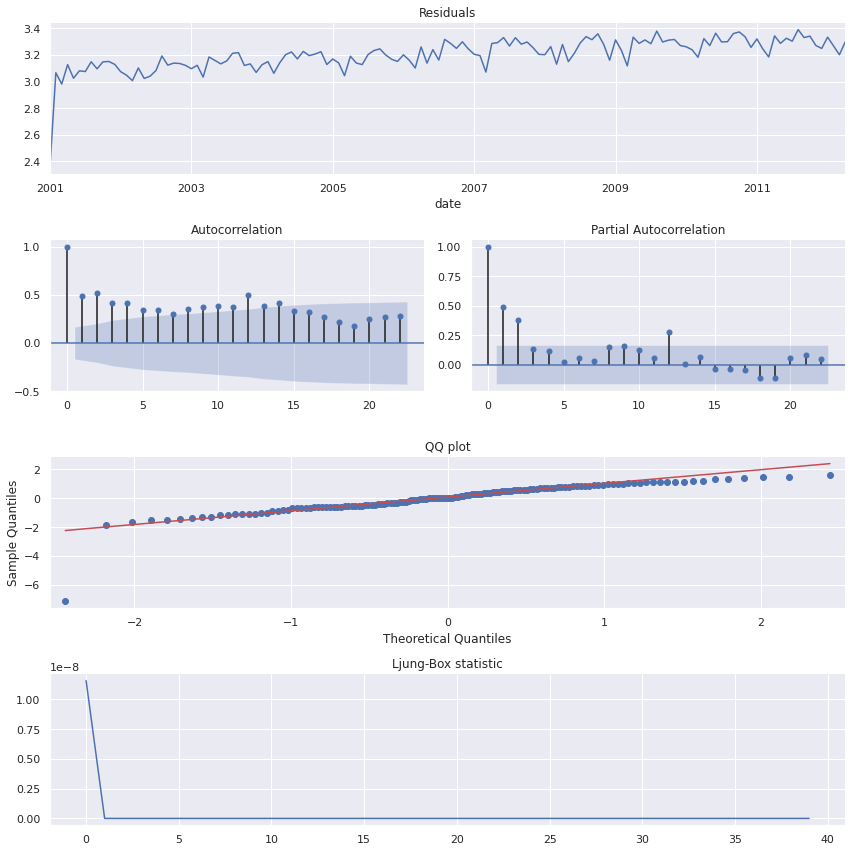

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5b258a9048>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b1d0d04a8>)

In [ ]:
tsplot(ts_data['prod_log'])

Again we see the high autocorrelation past 10 - indicates we still need differencing. We see all is very similar to first chart.

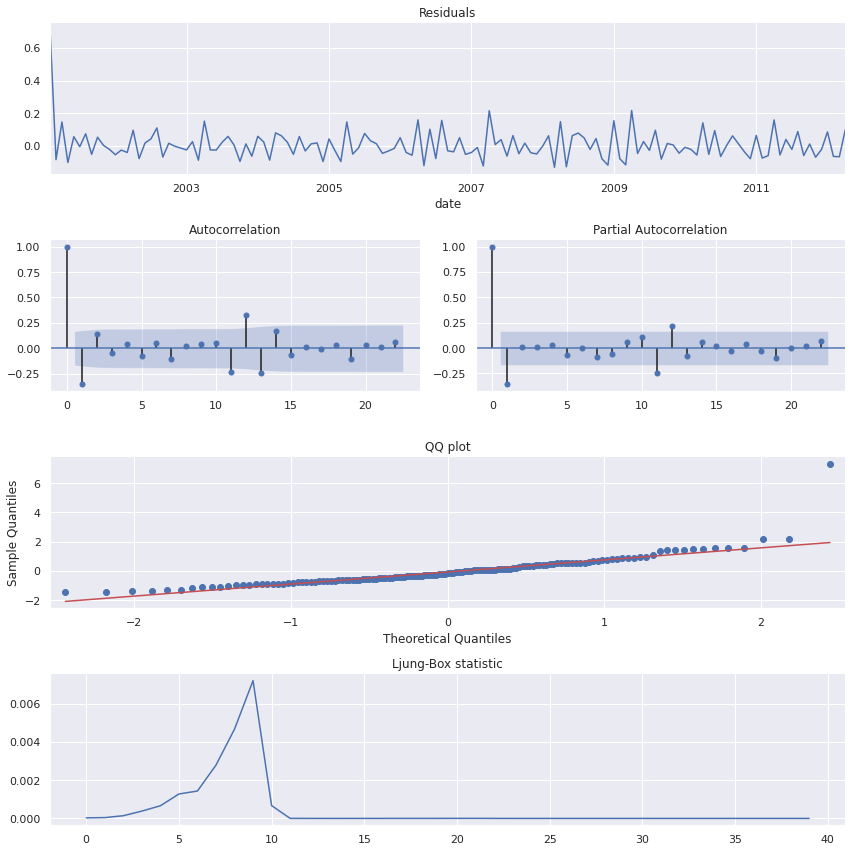

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5b1caf0860>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b1ca73828>)

In [ ]:
tsplot(ts_data['diff_prod_log'][1:]) #dropped the NaN value in first row

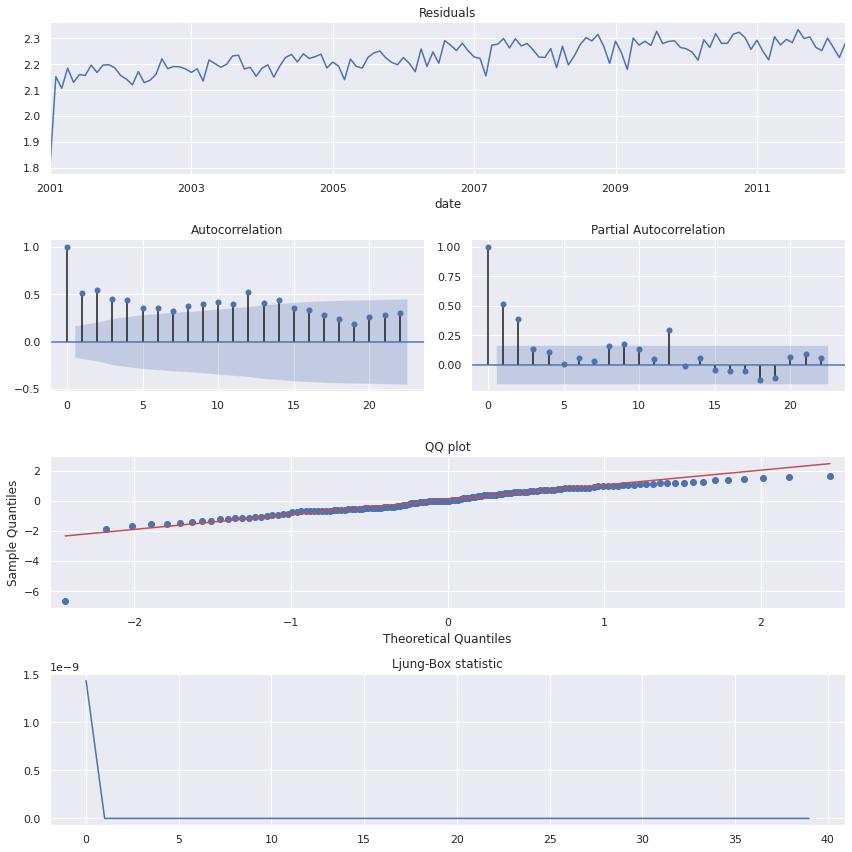

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5b1c782a20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b1c6bed68>)

In [ ]:
tsplot(ts_data['diff_prod_sqrt'])

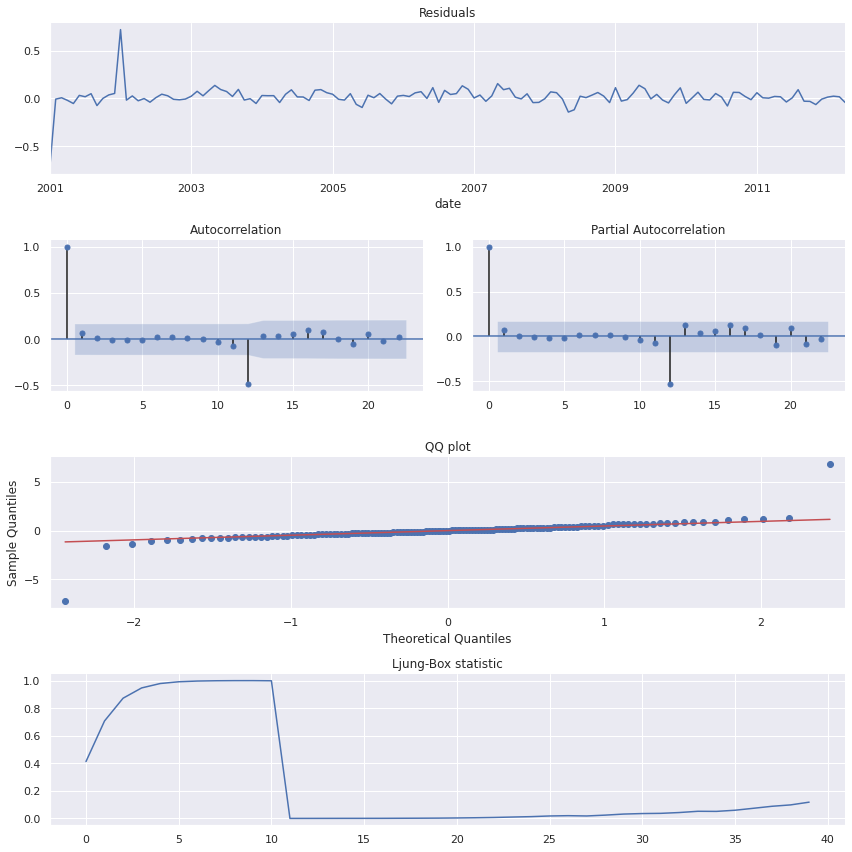

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5b1c5bae80>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b1c4952e8>)

In [ ]:
tsplot(ts_data['diff_prod_log_12'])

From the above analysis we see the diff_prod_log_12, which accounts for the seasonality of monthly data looks like the best choice. The auto-correlation most points are small,  Ljung-Box statistic has the most significant points of all the models... though a lot of it is insignificant still, the residuals look pretty stable, and the QQ plot is reasonably OK. 

The other main reason to use the difference is because in the models where we didn't use the difference we see non-stationarity.

### Problem 2c (20 points)
Model the data as discussed in lecture and section.  You will likely try a number of different models until something "works".  Do include what you tried with a 1-line explanation for what's wrong and what you're trying next unless you fully automate the search (which is more difficult). Apply the appropriate diagnostics 

                              ARMA Model Results                              
Dep. Variable:               prod_log   No. Observations:                  148
Model:                     ARMA(1, 0)   Log Likelihood                 186.384
Method:                       css-mle   S.D. of innovations              0.069
Date:                Sat, 31 Oct 2020   AIC                           -366.769
Time:                        21:36:15   BIC                           -357.777
Sample:                    01-31-2000   HQIC                          -363.115
                         - 04-30-2012                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1978      0.019    166.094      0.000       3.160       3.236
ar.L1.prod_log     0.7122      0.058     12.335      0.000       0.599       0.825
                                    

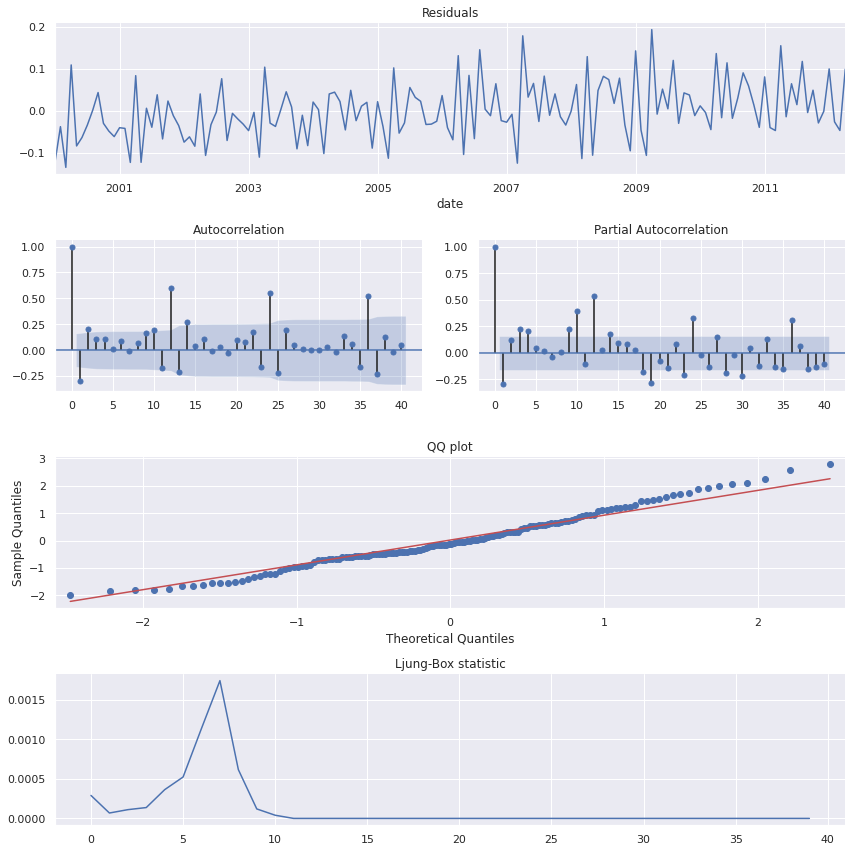

In [ ]:

ar_mod = ARIMA(ts_data['prod_log'], freq='M', order=(1,0,0)) # run with order=(2,0,0), ... order=(5,0,0)
results_AR = ar_mod.fit()
print(results_AR.summary())

_ = tsplot(results_AR.resid, 40)

The Ljung Box statistic is better than other 

                              ARMA Model Results                              
Dep. Variable:               prod_log   No. Observations:                  148
Model:                     ARMA(2, 0)   Log Likelihood                 200.924
Method:                       css-mle   S.D. of innovations              0.062
Date:                Sat, 31 Oct 2020   AIC                           -393.848
Time:                        21:36:24   BIC                           -381.859
Sample:                    01-31-2000   HQIC                          -388.977
                         - 04-30-2012                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1956      0.029    108.535      0.000       3.138       3.253
ar.L1.prod_log     0.4102      0.074      5.518      0.000       0.264       0.556
ar.L2.prod_log     0.4249      0.075

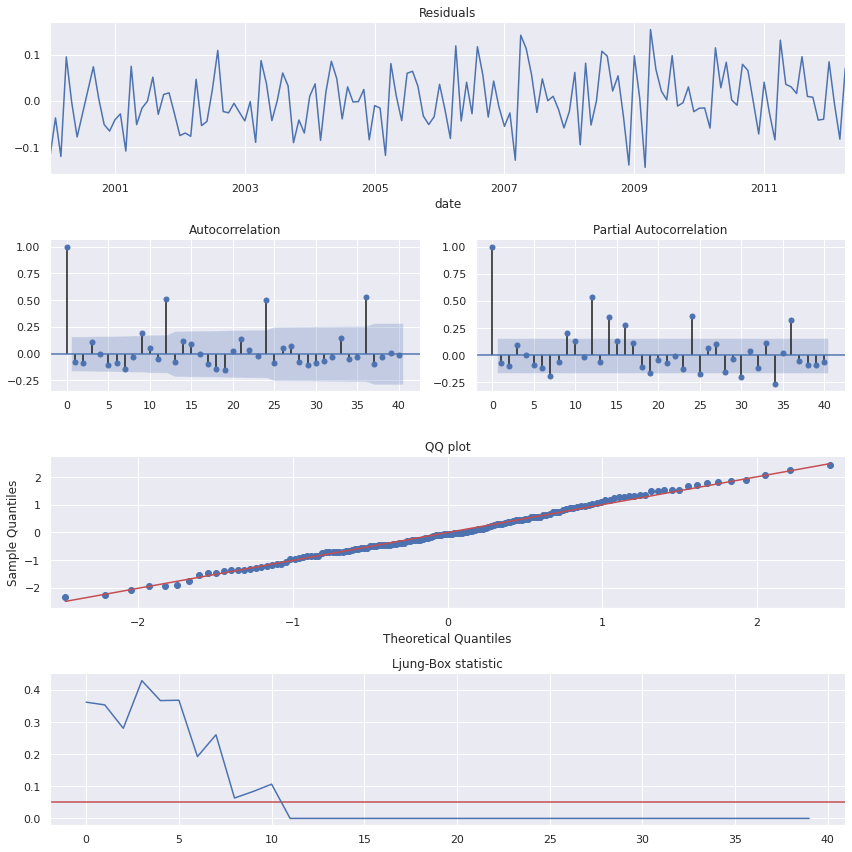

In [ ]:
# Fit an ARIMA (1,0,0) or AR(1) model to the log WPI, including an intercept

ar_mod = ARIMA(ts_data['prod_log'], freq='M', order=(2,0,0)) # run with order=(2,0,0), ... order=(5,0,0)
results_AR = ar_mod.fit()
print(results_AR.summary())

_ = tsplot(results_AR.resid, 40)

                              ARMA Model Results                              
Dep. Variable:               prod_log   No. Observations:                  148
Model:                     ARMA(3, 0)   Log Likelihood                 203.399
Method:                       css-mle   S.D. of innovations              0.061
Date:                Sat, 31 Oct 2020   AIC                           -396.797
Time:                        21:36:26   BIC                           -381.811
Sample:                    01-31-2000   HQIC                          -390.709
                         - 04-30-2012                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1933      0.035     90.422      0.000       3.124       3.262
ar.L1.prod_log     0.3334      0.081      4.131      0.000       0.175       0.492
ar.L2.prod_log     0.3503      0.081

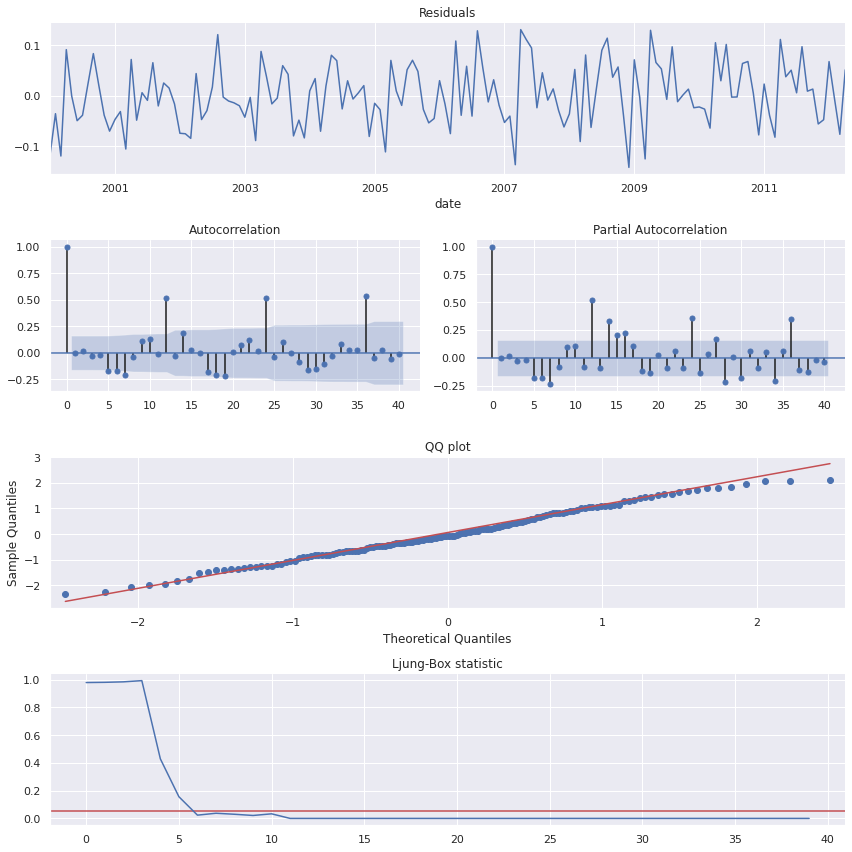

In [ ]:
ar_mod = ARIMA(ts_data['prod_log'], freq='M', order=(3,0,0)) 
results_AR = ar_mod.fit()
print(results_AR.summary())

_ = tsplot(results_AR.resid, 40)

                             ARIMA Model Results                              
Dep. Variable:             D.prod_log   No. Observations:                  147
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 199.987
Method:                       css-mle   S.D. of innovations              0.062
Date:                Sat, 31 Oct 2020   AIC                           -391.975
Time:                        21:36:27   BIC                           -380.013
Sample:                    02-29-2000   HQIC                          -387.115
                         - 04-30-2012                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0014      0.003      0.496      0.621      -0.004       0.007
ar.L1.D.prod_log    -0.6253      0.080     -7.779      0.000      -0.783      -0.468
ar.L2.D.prod_log    -0.2332 

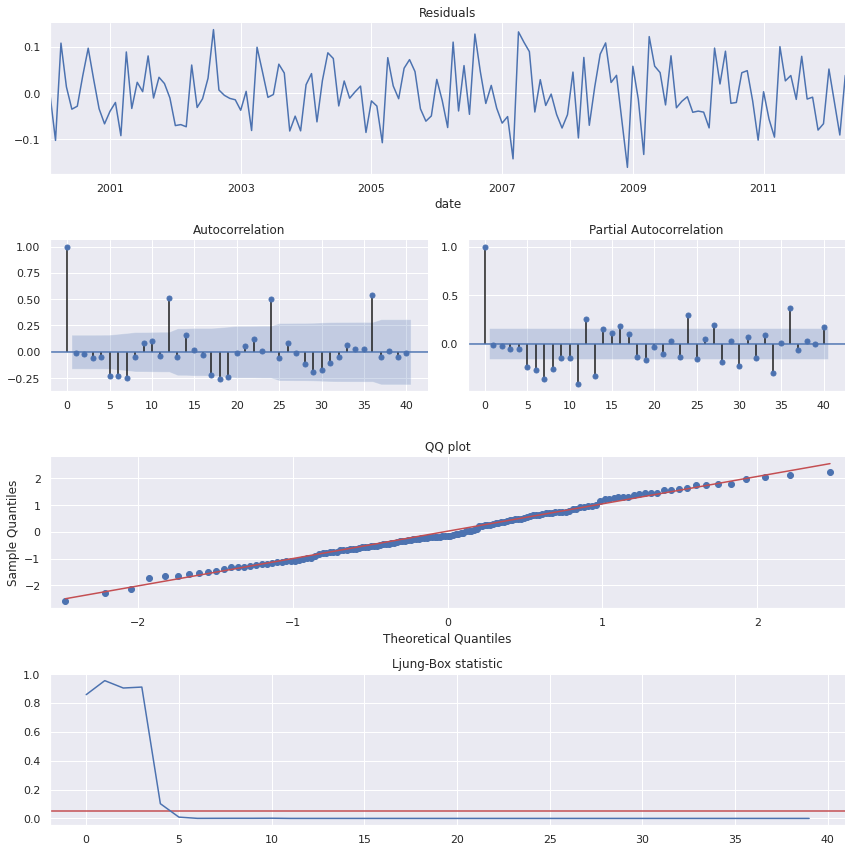

In [ ]:
# Fit an ARIMA (1,0,0) or AR(1) model to the log WPI, including an intercept

ar_mod = ARIMA(ts_data['prod_log'], freq='M', order=(2,1,0)) # run with order=(2,0,0), ... order=(5,0,0)
results_AR = ar_mod.fit()
print(results_AR.summary())

_ = tsplot(results_AR.resid, 40)

                             ARIMA Model Results                              
Dep. Variable:             D.prod_log   No. Observations:                  147
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 212.393
Method:                       css-mle   S.D. of innovations              0.056
Date:                Sat, 31 Oct 2020   AIC                           -414.787
Time:                        21:36:29   BIC                           -399.835
Sample:                    02-29-2000   HQIC                          -408.712
                         - 04-30-2012                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0018      0.000     11.427      0.000       0.002       0.002
ar.L1.D.prod_log     0.1621      0.081      1.990      0.048       0.002       0.322
ar.L2.D.prod_log     0.1681 

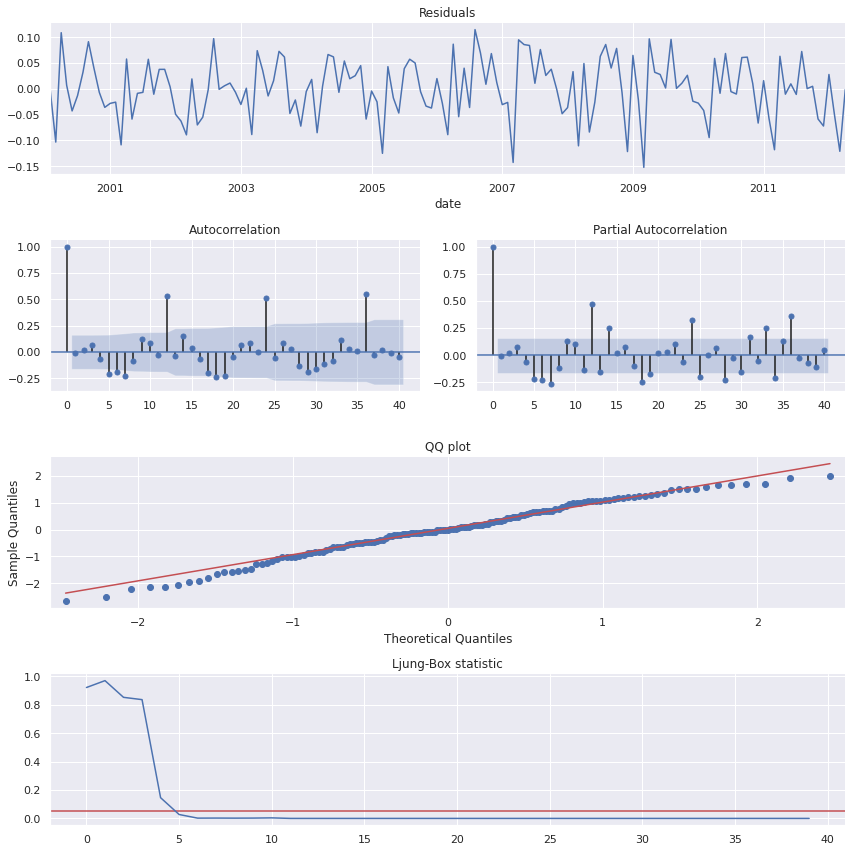

In [ ]:
# Fit an ARIMA (1,0,0) or AR(1) model to the log WPI, including an intercept

ar_mod = ARIMA(ts_data['prod_log'], freq='M', order=(2,1,1)) # run with order=(2,0,0), ... order=(5,0,0)
results_AR = ar_mod.fit()
print(results_AR.summary())

_ = tsplot(results_AR.resid, 40)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:               prod_log   No. Observations:                  148
Model:                     ARMA(3, 3)   Log Likelihood                 206.306
Method:                       css-mle   S.D. of innovations              0.059
Date:                Sat, 31 Oct 2020   AIC                           -396.611
Time:                        21:40:49   BIC                           -372.634
Sample:                    01-31-2000   HQIC                          -386.869
                         - 04-30-2012                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1777      0.087     36.528      0.000       3.007       3.348
ar.L1.prod_log     1.0097        nan        nan        nan         nan         nan
ar.L2.prod_log     0.9732        nan

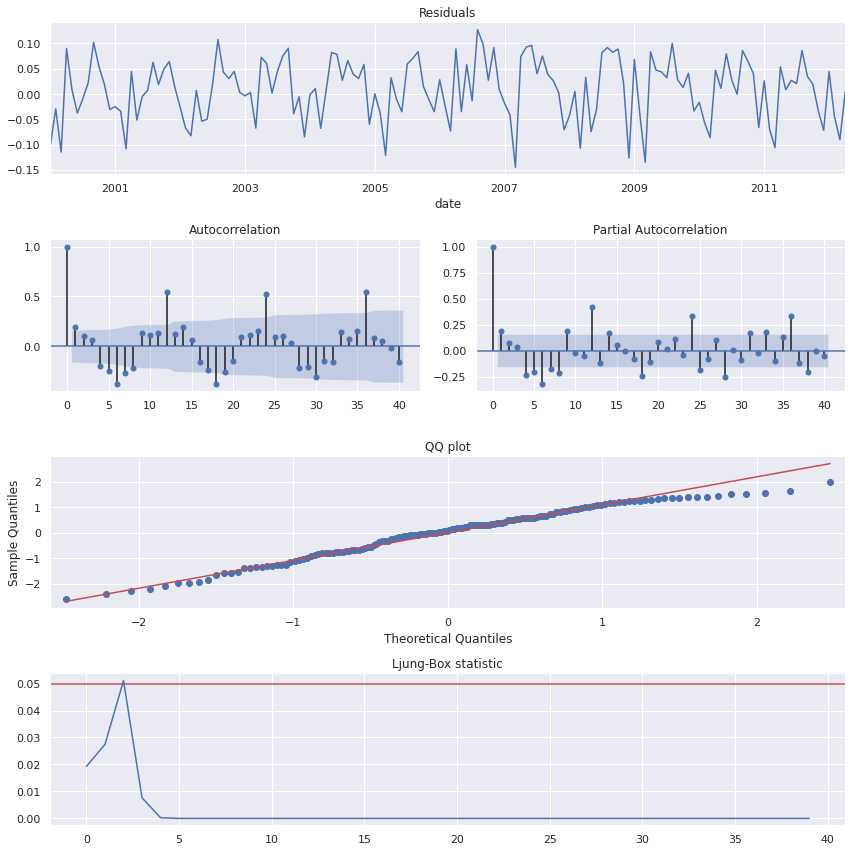

In [ ]:
ar_mod = ARIMA(ts_data['prod_log'], freq='M', order=(3,0,3)) # run with order=(2,0,0), ... order=(5,0,0)
results_AR = ar_mod.fit()
print(results_AR.summary())

_ = tsplot(results_AR.resid, 40)

These don't seem to be working that well so I'll try the diff data. 

In [ ]:
diff_data = ts_data.iloc[12:,:]
diff_data.head()

,month,production,date,prod_diff_12,prod_log,prod_sqrt,diff_prod_log,diff_prod_log_12,diff_prod_sqrt
date,,,,,,,,,
2001-01-31,12,21.575329,2001-01-31,-0.109419,3.071551,4.644925,-0.005568,-0.005059,2.155209
2001-02-28,13,21.454858,2001-02-28,-0.167254,3.065951,4.631939,-0.005599,-0.007765,2.152194
2001-03-31,14,19.707390,2001-03-31,0.124093,2.980994,4.439301,-0.084957,0.006317,2.106965
2001-04-30,15,22.806061,2001-04-30,-0.484540,3.127026,4.775569,0.146033,-0.021024,2.185308
2001-05-31,16,20.587487,2001-05-31,-1.142134,3.024683,4.537344,-0.102343,-0.053993,2.130104


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                              ARMA Model Results                              
Dep. Variable:           prod_diff_12   No. Observations:                  136
Model:                     ARMA(3, 3)   Log Likelihood                -219.684
Method:                       css-mle   S.D. of innovations              1.198
Date:                Sat, 31 Oct 2020   AIC                            455.367
Time:                        21:56:34   BIC                            478.668
Sample:                    01-31-2001   HQIC                           464.836
                         - 04-30-2012                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4987      0.060      8.299      0.000       0.381       0.617
ar.L1.prod_diff_12    -0.4536      0.089     -5.084      0.000      -0.629      -0.279
ar.L2.prod_diff_12  

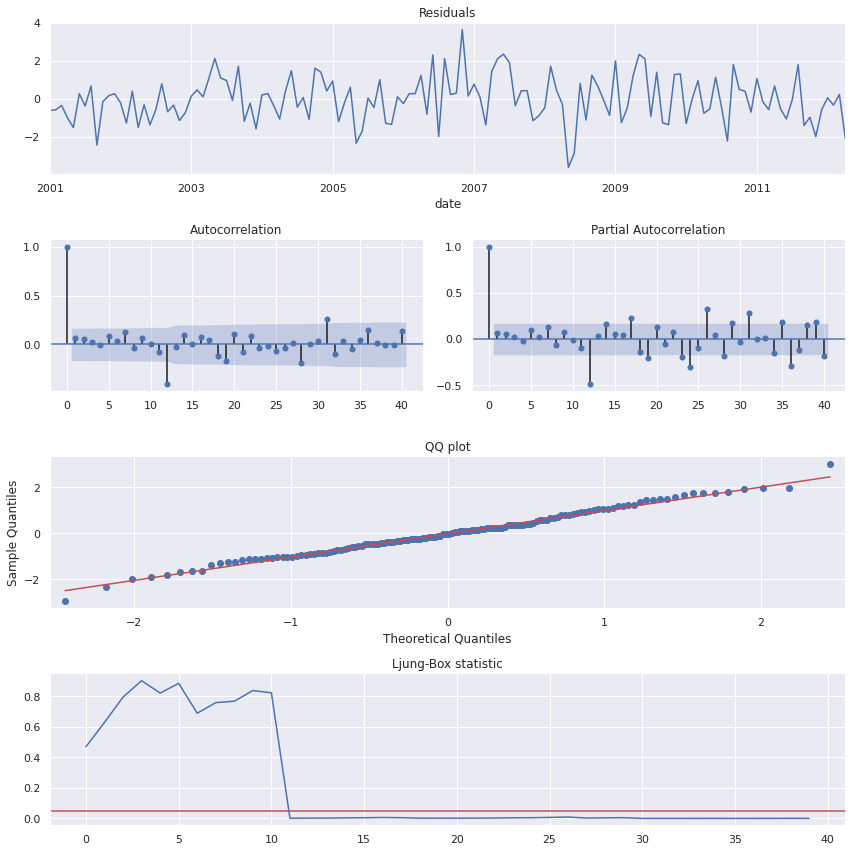

In [ ]:

ar_mod = ARIMA(diff_data['prod_diff_12'], freq='M', order=(3,0,3)) # run with order=(2,0,0), ... order=(5,0,0)
results_AR = ar_mod.fit()
print(results_AR.summary())

_ = tsplot(results_AR.resid, 40)

                              ARMA Model Results                              
Dep. Variable:       diff_prod_log_12   No. Observations:                  136
Model:                     ARMA(3, 3)   Log Likelihood                 217.801
Method:                       css-mle   S.D. of innovations              0.048
Date:                Sat, 31 Oct 2020   AIC                           -419.603
Time:                        21:57:50   BIC                           -396.302
Sample:                    01-31-2001   HQIC                          -410.134
                         - 04-30-2012                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0203      0.003      8.082      0.000       0.015       0.025
ar.L1.diff_prod_log_12    -0.4562      0.072     -6.355      0.000      -0.597      -0.315
ar.L

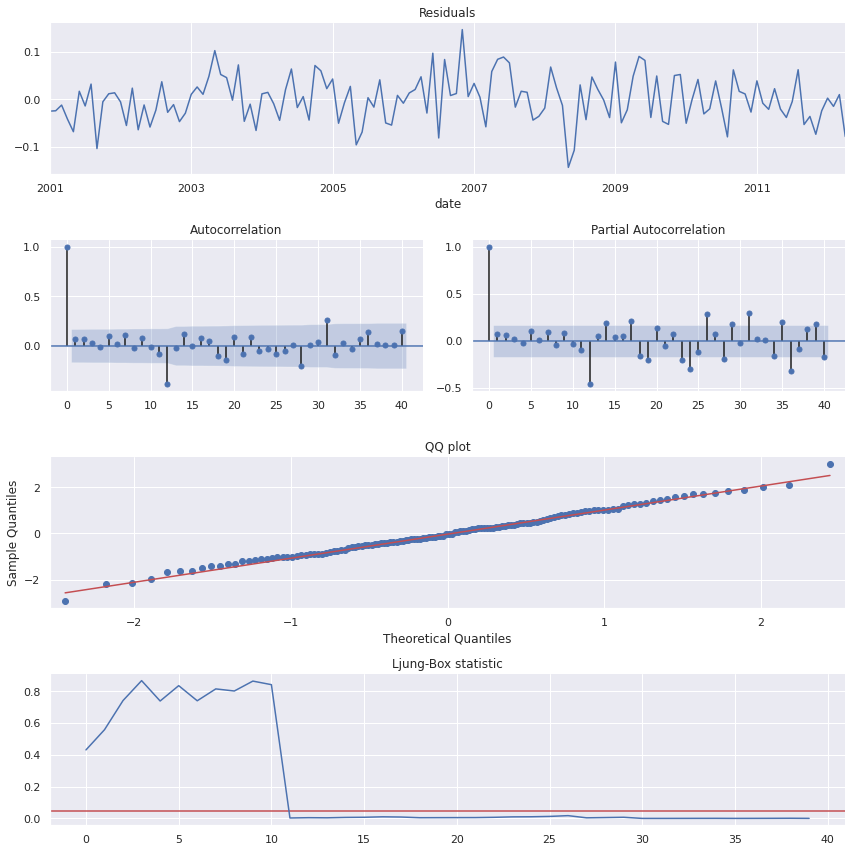

In [ ]:

ar_mod = ARIMA(diff_data['diff_prod_log_12'], freq='M', order=(3,0,3)) # run with order=(2,0,0), ... order=(5,0,0)
results_AR = ar_mod.fit()
print(results_AR.summary())

_ = tsplot(results_AR.resid, 40)

Both my simple prod log with difference of 1w and my regular 12 difference both look much more significant with the Ljung Boz

## Problem 3 (10 points)

For a time series data set, a (2,1,0) was derived with the following coefficients:

const   -0.3916      
ar1      0.9172      
ar2     -0.2390      

The last 5 points are [...-104.6, -102.1, -103.2, -109.8, -115.7]

Compute the next 3 data points by writing the calculation in python.  Note that this will require not only plugging values into the equation, but also taking the d term of the (p,d,q) ARIMA model into account.  We do not need a general form or function--just the required calculations.

Note: Because this is a order on differencing model AND has a constant,, we can infer that the series likely  has a non-zero average trend
(rule 5 in https://people.duke.edu/~rnau/arimrule.htm)

In [ ]:
#First i'll define data we have here:
terms = [-104.6, -102.1, -103.2, -109.8, -115.7]
const =  -0.3916
ar1 = 0.9172
ar2 = -0.2390

#then create a function that i can usse to calculate ehse points
def pred_ts(pointt_1,pointt_2,pointt_3):
  return(pointt_1 + const + ar1*(pointt_1 - pointt_2) + ar2*(pointt_2 - pointt_3))

In [ ]:
#test on the 5th term
pred_ts(terms[3],terms[2],terms[1])

-115.98221999999998

In [ ]:
pred_ts(terms[2],terms[1],terms[0])

-105.19802

In [ ]:
#finally calculate the first prediction
pred1 = pred_ts(terms[4],terms[3],terms[2])
pred1

-119.92568000000001

In [ ]:
pred2 = pred_ts(pred1,terms[4],terms[3])
pred2

-122.78297369600003

In [ ]:
pred3 = pred_ts(pred2, pred1,terms[4])
pred3

-124.78534595397123

For this problem there was an interesting result with the difference in the prediction for the 4th term and the given value. I think this is because of the random error function; we assume error for the puproses of prediction but in reality it can always be off. 

## Problem 4 Survival Analysis (25 points)

This problem uses the survival_unemployment.csv data file provided.
The dataset is exploring unemployment for 3300 affected individuals.  An event of 1 indicates that a person found a job after "weeks" search.  The remaining variables characterize the person and previous salary.

In [ ]:
 unemploy = pd.read_csv('/content/gdrive/My Drive/masters/2020Fall_CSCI-82/hw4-timeseries/survival_unemployment.csv')
 unemploy.head(25)
 re_employ = unemploy[unemploy.event ==1]
#  re_employ.head()
#  re_employ.describe()

,weeks,event,age,logsalary,married,isfemale,hasChildren,caucasian
count,1062.000000,1062.0,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,4.419962,1.0,35.247646,5.784913,0.644068,0.341808,0.467985,0.910546
std,4.894620,0.0,10.065379,0.526396,0.479020,0.474539,0.499209,0.285532
min,0.000000,1.0,20.000000,4.400121,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.0,27.000000,5.416170,0.000000,0.000000,0.000000,1.000000
50%,3.000000,1.0,34.000000,5.764866,1.000000,0.000000,0.000000,1.000000
75%,6.000000,1.0,42.000000,6.124120,1.000000,1.000000,1.000000,1.000000
max,27.000000,1.0,61.000000,7.673190,1.000000,1.000000,1.000000,1.000000


In [ ]:
unemploy.describe()
unemploy[unemploy.event==1].shape

(1062, 8)

### Problem 4a (8 points)

Create a Kaplan-Meier plot of the raw data (no other variables).  Use this to answer what is the median time it takes for individuals to find a job.

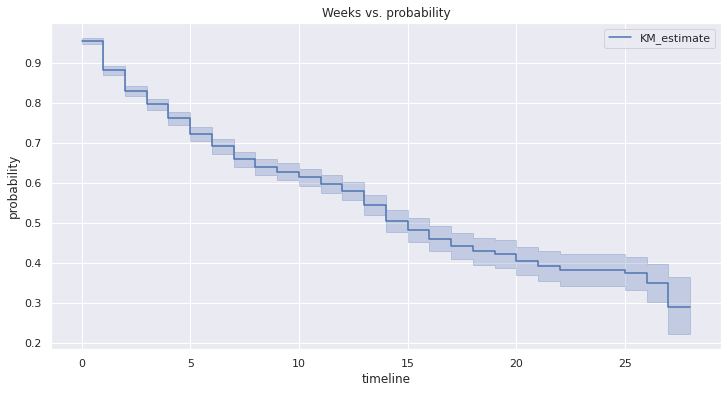

In [ ]:
kmf = KaplanMeierFitter()
T = unemploy['weeks']
C = unemploy['event']
kmf.fit(T,C);

plt.figure(figsize=(12,6));
plt.title('Weeks vs. probability')
plt.ylabel('probability')
kmf.plot();

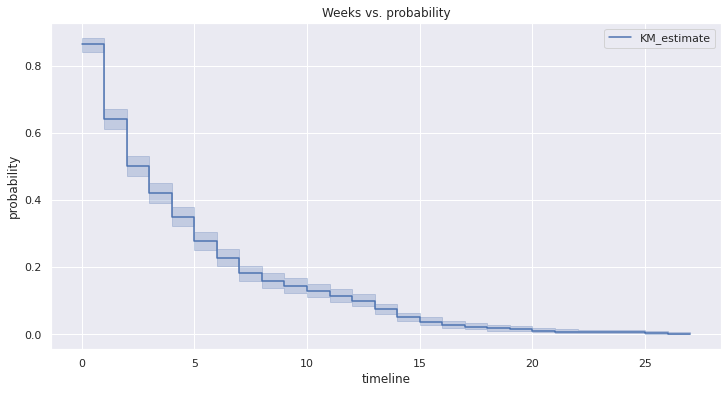

In [ ]:
# kmf = KaplanMeierFitter()
# T = re_employ['weeks']
# C = re_employ['event']
# kmf.fit(T,C);

# plt.figure(figsize=(12,6));
# plt.title('Weeks vs. probability')
# plt.ylabel('probability')
# kmf.plot();

### Problem 4b (4 points)

Some say that married folks have an easier time finding work.  Create a Kaplan-Meier plot and interpret the difference in duration (which group and by how many weeks) for the first 25% that find work.

In [ ]:
#we see the in the .describe() of the dataset from above that th 25% quartile is at 2 weeks.  
# first_jobs = unemploy[unemploy.weeks<2]
married_jobs = unemploy[(unemploy.married == 1)]
single_jobs = unemploy[(unemploy.married == 0)]
print(first_jobs_married.describe())
print(first_jobs_single.describe())
# num_needed_25 round(.25*first_jobs_married.shape[0] - first_jobs_married[first_jobs_married.weeks < 2].shape[0])
# first_jobs_single[first_jobs_single.weeks < 2].shape[0]

             weeks        event  ...  hasChildren    caucasian
count  1931.000000  1931.000000  ...  1931.000000  1931.000000
mean      5.771621     0.354221  ...     0.622993     0.891248
std       5.629506     0.478400  ...     0.484762     0.311408
min       0.000000     0.000000  ...     0.000000     0.000000
25%       2.000000     0.000000  ...     0.000000     1.000000
50%       4.000000     0.000000  ...     1.000000     1.000000
75%       8.000000     1.000000  ...     1.000000     1.000000
max      27.000000     1.000000  ...     1.000000     1.000000

[8 rows x 8 columns]
             weeks        event  ...  hasChildren    caucasian
count  1369.000000  1369.000000  ...  1369.000000  1369.000000
mean      5.720234     0.276114  ...     0.203068     0.815924
std       5.642612     0.447237  ...     0.402430     0.387688
min       0.000000     0.000000  ...     0.000000     0.000000
25%       2.000000     0.000000  ...     0.000000     1.000000
50%       4.000000     0.000000  

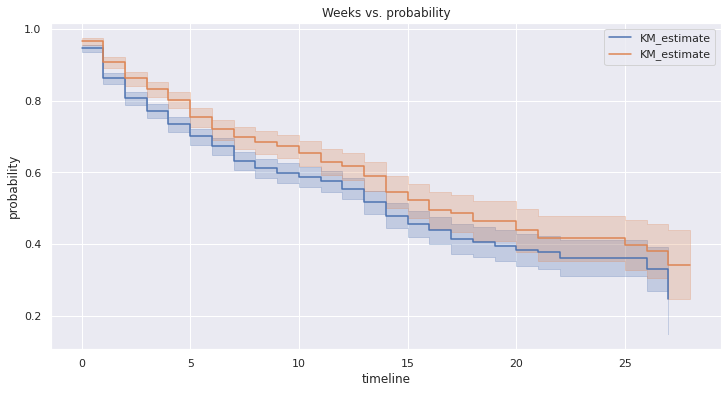

In [ ]:
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
T_mq = married_jobs['weeks']
C_mq = married_jobs['event']
kmf1.fit(T_mq,C_mq);

T_sq = single_jobs['weeks']
C_sq = single_jobs['event']
kmf2.fit(T_sq,C_sq);


plt.figure(figsize=(12,6));
plt.title('Weeks vs. probability')
plt.ylabel('probability')
kmf1.plot()
kmf2.plot();

In [ ]:
# print("first 25% of married: ",.25*1931)
# print("first 25% of single: ",.25*1369)

q1_married_jobs = married_jobs[married_jobs.weeks < 3] #more than the top 25%
q1_single_jobs = single_jobs[single_jobs.weeks < 3]


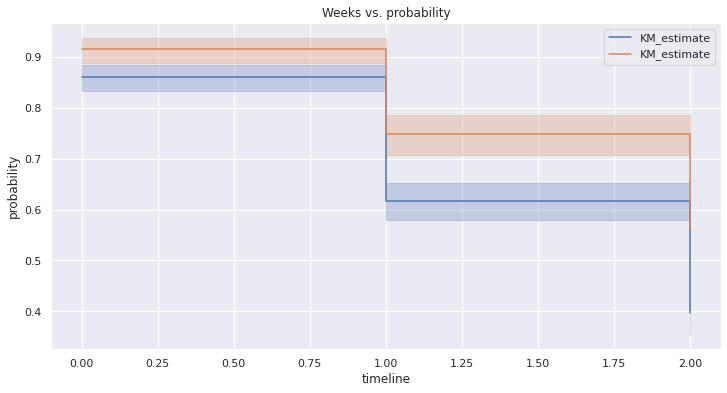

In [ ]:
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
T_mq = q1_married_jobs['weeks']
C_mq = q1_married_jobs['event']
kmf1.fit(T_mq,C_mq);

T_sq = q1_single_jobs['weeks']
C_sq = q1_single_jobs['event']
kmf2.fit(T_sq,C_sq);


plt.figure(figsize=(12,6));
plt.title('Weeks vs. probability')
plt.ylabel('probability')
kmf1.plot()
kmf2.plot();

### Problem 4c (8 points)

Iterate on the Cox Proportional Hazards Model to identify the set of features (age, logsalary, married, isfemale, hasChildren, caucasian).


In [ ]:
cph = CoxPHFitter()
cph.fit(unemploy, duration_col='weeks', event_col='event')

cph.print_summary() 

<lifelines.CoxPHFitter: fitted with 3300 total observations, 2238 right-censored observations>
             duration col = 'weeks'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 3300
number of events observed = 1062
   partial log-likelihood = -7793.61
         time fit was run = 2020-10-31 16:52:20 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
age          -0.02       0.98       0.00            -0.03            -0.01                 0.97                 0.99
logsalary     0.30       1.35       0.06             0.18             0.42                 1.20                 1.53
married       0.28       1.32       0.07             0.13             0.42                 1.14                 1.53
isfemale      0.11       1.11       0.07            -0.03             0.24                 0.98                 1.27
hasChildren  -0.08       0.93       0.07            -0.21             0.06                 0.81                 1.06
caucasian     0.58       1.79       0.11             0.37             0.80                 1.44                 2.22

                z      p   -log2(p)
covariate                          
age         -6.17 <0.005      30.46
logsalary    4.82 <0.005      19.41
married      3.76 <0.005      12.54
isfemale     1.59   0.11       3.16
hasChildren -1.10   0.27       1.89
caucasian    5.32 <0.005      23.20
---
Concordance = 0.59
Partial AIC = 15599.21
log-likelihood ratio test = 107.37 on 6 df
-log2(p) of ll-ratio test = 66.91

In [ ]:
cph = CoxPHFitter()
cph.fit(unemploy, duration_col='weeks', event_col='event')

cph.print_summary() 

In [ ]:
cph.params_

covariate
age           -0.019781
logsalary      0.300989
married        0.278314
isfemale       0.107891
hasChildren   -0.076165
caucasian      0.582808
Name: coef, dtype: float64

### Problem 4d (5 points)

For the feature that has the most effect:
* what is the feature?
* what is the relevant coefficient?
* how much does it change the duration of unemployment
* which direction is the change?

The most relevant feature is caucasian, followed by log salary. This means if you're rich and white you're likely to get back into employment quickly. We can likely drop the is female and has children variable.

If you are caucasian the slope is .58.  

## Problem 5a Hours (2 points)
How many hours did this homework take you?  The answer to this question will not affect your grade.

14 hours

## Problem 5b PDF (3 points)

Save this notebook as LastnameFirstnameHW4.ipynb such as JacksonMichael.ipynb. Create a pdf of this notebook named similarly. Submit both the python notebook and the pdf version to the Canvas dropbox. We require both versions.